# Imports and Constants

In [31]:
from mtgsdk import Card as crd
from IPython.display import display, Image
from PIL import Image
from os import listdir
from sklearn.cluster import KMeans
from skimage.measure import compare_ssim as ssim
import cv2
import requests
import io
import os
import pickle as pkl
import pandas as pd
import numpy as np
import urllib.request
import matplotlib.pyplot as plt

DATA_DIR="Data"
IMAGE_PATH="{}/Images"

# Getting the Database

Run this cell if you do not have an up to date cardData.csv file in your data directory.

In [8]:
cards = crd.all()
cDict = [c.__dict__ for c in cards]
df = pd.DataFrame(cDict)
if(not os.path.exists(DATA_DIR)):
    os.makedirs(DATA_DIR)
df.to_csv('Data/cardData.csv', encoding='utf-8')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35983 entries, 0 to 35982
Data columns (total 39 columns):
artist            35983 non-null object
border            22 non-null object
cmc               35983 non-null float64
color_identity    31897 non-null object
colors            28223 non-null object
flavor            21356 non-null object
foreign_names     23871 non-null object
hand              116 non-null float64
id                35983 non-null object
image_url         33753 non-null object
layout            35983 non-null object
legalities        35171 non-null object
life              116 non-null float64
loyalty           203 non-null float64
mana_cost         31671 non-null object
multiverse_id     33753 non-null float64
name              35983 non-null object
names             475 non-null object
number            29781 non-null object
original_text     33298 non-null object
original_type     34034 non-null object
power             16760 non-null object
printings        

Run this cell if you already have the csv file.

In [7]:
df = pd.read_csv("Data/cardData.csv")
df.info()

C:\Users\Nicholas\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (2,18,25,29,30,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35983 entries, 0 to 35982
Data columns (total 40 columns):
Unnamed: 0        35983 non-null int64
artist            35983 non-null object
border            22 non-null object
cmc               35983 non-null float64
color_identity    31897 non-null object
colors            28223 non-null object
flavor            21356 non-null object
foreign_names     23871 non-null object
hand              116 non-null float64
id                35983 non-null object
image_url         33753 non-null object
layout            35983 non-null object
legalities        35171 non-null object
life              116 non-null float64
loyalty           203 non-null float64
mana_cost         31671 non-null object
multiverse_id     33753 non-null float64
name              35983 non-null object
names             475 non-null object
number            29781 non-null object
original_text     33298 non-null object
original_type     34034 non-null object
power             

<h3>Trim dataframe to Contain Only Card Name and Image Path of Correct Set</h3>

In [25]:
df[["name", "image_url"]].head(10)
dftemp = df.loc[df['set_name'] == 'Ixalan']
dfimg = dftemp[['name', 'set_name', 'image_url']].dropna()
dfimg.head(10)

,name,set_name,image_url
11932,Adanto Vanguard,Ixalan,http://gatherer.wizards.com/Handlers/Image.ash...
11933,Ashes of the Abhorrent,Ixalan,http://gatherer.wizards.com/Handlers/Image.ash...
11934,Axis of Mortality,Ixalan,http://gatherer.wizards.com/Handlers/Image.ash...
11935,Bellowing Aegisaur,Ixalan,http://gatherer.wizards.com/Handlers/Image.ash...
11936,Bishop of Rebirth,Ixalan,http://gatherer.wizards.com/Handlers/Image.ash...
11937,Bishop's Soldier,Ixalan,http://gatherer.wizards.com/Handlers/Image.ash...
11938,Bright Reprisal,Ixalan,http://gatherer.wizards.com/Handlers/Image.ash...
11939,Demystify,Ixalan,http://gatherer.wizards.com/Handlers/Image.ash...
11940,Duskborne Skymarcher,Ixalan,http://gatherer.wizards.com/Handlers/Image.ash...
11941,Emissary of Sunrise,Ixalan,http://gatherer.wizards.com/Handlers/Image.ash...


In [26]:
for index,row in dfimg.iterrows():
    url=row.image_url
    name = row['name']
    set_name = row.set_name
    directory = "Data/Images/{}".format(set_name)
    if(not os.path.exists(directory)):
        os.makedirs(directory)
    urllib.request.urlretrieve(url, "Data/Images/{}/{}.jpg".format(set_name,name))

KeyboardInterrupt: 

In [42]:
def loadImages(path):
    imagesList = listdir(path)
    loadedImages = []
    for image in imagesList:
        img = Image.open(path + image)
        loadedImages.append(img)
    return loadedImages

image = Image.open("/Users/Nicholas/Documents/CSE 391 Data Science/CardClassifier/Data/Images/Ixalan/Adanto Vanguard.jpg")

image = np.array(image, dtype=np.float64) / 255

w, h, d = original_shape = tuple(image.shape)
#assert d == 3
image_array = np.reshape(image, (w * h, d))

#arr = np.array(image)
#np.array(arr).mean(axis=(0,1))
#arr[:,:,:-1]

In [2]:
numberClust = 64
kmeans = KMeans(n_clusters=numberClust, random_state=0)
kmeans.fit(image_array)
labels = kmeans.predict(image_array)

#def recreate_image(codebook, labels, w, h):
#    d = codebook.shape[1]
#    image = np.zeros((w, h, d))
#    label_idx = 0
#    for i in range(w):
#        for j in range(h):
#            image[i][j] = codebook[labels[label_idx]]
#            label_idx += 1
#    return image

#plt.clf()
#ax = plt.axes([0, 0, 1, 1])
#plt.axis('off')
#plt.title('Quantized image (64 colors, K-Means)')
#plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

#plt.show()
#print(kmeans.cluster_centers_)

NameError: name 'image_array' is not defined

In [51]:
X = np.array([[1, 2], [1, 4], [1, 0], [4, 2], [4, 4], [4, 0]])
X.shape

(6, 2)

In [60]:
def makeClusters(n) :
    L=[]
    center0 = np.array([0, 0, 0])
    L.append(center0)
    centerFinal = np.array([255, 255, 255])
    for i in range(1, n-1) :
        center = (255*i)/(n-1)
        L.append(np.array([center, center, center]))
    L.append(centerFinal)
    return L

makeClusters(4)

[array([0, 0, 0]),
 array([ 85.,  85.,  85.]),
 array([ 170.,  170.,  170.]),
 array([255, 255, 255])]

In [61]:
# The function below returns the Mean Squared Error of the images.
# The smaller the error, the more similar the images are. 
def MSE(image1, image2) :
    err = np.sum((image1.astype("float")-image2.astype("float"))**2)
    err /= float(image1.shape[0]*image1.shape[1])
    return err

# This function compares two images and returns how similar they are.
def compareImages(image1, dbImage, name) :
    s = ssim(image1, dbImage, multichannel=True)
    #m = MSE(image1, dbImage)
    return s, name, dbImage

In [106]:
path = "Data/Images/Ixalan/"
direct = os.fsencode("Data/Images/Ixalan")
testImage = cv2.imread("/Users/Nicholas/Downloads/TestCase_11.jpg")
testImageBW = cv2.cvtColor(testImage, cv2.COLOR_BGR2GRAY)
currentMax = None

for file in os.listdir(direct) :
    filename = os.fsdecode(file)
    i = cv2.imread(path+filename)
    iBW = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
    temp = tuple(reversed(i.shape[:-1]))
    resizeImage = cv2.resize(testImageBW, temp)
    score = compareImages(resizeImage, iBW, filename)
    if currentMax==None :
        currentMax=score
    elif currentMax[0] < score[0] :
        currentMax=score

0.260049097643 Island.jpg


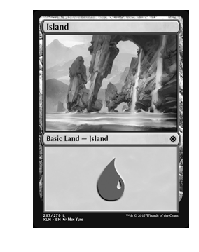

In [107]:
print(currentMax[0], currentMax[1])
fig = plt.figure(currentMax[1])
 
plt.imshow(currentMax[2], cmap = plt.cm.gray)
plt.axis("off")

plt.show()

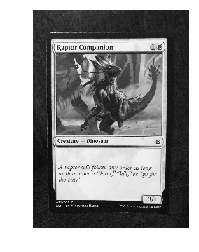

In [108]:
plt.imshow(resizeImage, cmap = plt.cm.gray)
plt.axis("off")

plt.show()